# Машинное обучение, ФКН ВШЭ

## Практическое задание 4. Классификация. 

### Общая информация
Дата выдачи: 29.10.2021

Мягкий дедлайн: 23:59MSK 10.11.2021 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 13.11.2021

### О задании

В этом задании вы:
- ознакомитесь с тем, что происходит "внутри" метода опорных векторов и логистической регрессии
- познакомитесь с калибровкой вероятности
- изучите методы трансформации переменных и методы отбора признаков
- попробуете оценить экономический эффект модели


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-04-classification-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-04-classification-IvanovIvan.ipynb).

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Часть 0. SVM, LR и калибровка вероятностей. 

Сгенерируем синтетические данные.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=10000, n_features=10, n_informative=5, n_redundant=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов и логистической регрессии.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили линейный вариант без ядрового перехода, что соответствует линейному ядру (`LinearSVC` или же `SVC(kernel='linear')` в `sklearn.svm`). Подберите параметр регуляризации `C` (можете воспользоваться кросс-валидацией или отделить валидационную выборку от обучающей). __Здесь и далее, если не сказано иначе, подбирайте оптимальные гиперпараметры с точки зрения AUC-PR.__

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
Cs = np.logspace(-2,2,50)
grid_values = {'C': Cs}

pipeline_svm = Pipeline(steps=[
    ('scaler', StandardScaler()),  
    ('svm', SVC())
])

grid_values = {'svm__C': Cs}
searcher = GridSearchCV(pipeline_svm, param_grid=grid_values, scoring='f1_macro', cv=5)
searcher.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.6768329...
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])},
             scoring='f1_macro')

In [ ]:
searcher.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=100.0))])

Получили, что наилучшее значение С = 100.0


Посмотрим теперь на точность, используя разлчные метрики


In [ ]:
pipeline_svm = Pipeline(steps=[
    ('scaler', StandardScaler()),  
    ('svm', SVC(C=100.0))
])
for metric in ['accuracy','precision', 'recall', 'f1_macro']:
    print(cross_val_score(pipeline_svm, X_test, y_test, scoring=metric, cv=5))

[0.935      0.93333333 0.935      0.96166667 0.935     ]
[0.93159609 0.92307692 0.92857143 0.96357616 0.93708609]
[0.94078947 0.94736842 0.94389439 0.96039604 0.9339934 ]
[0.93497815 0.93328589 0.93497815 0.961664   0.93499549]


На тестовой части постройте ROC и PR кривые, а также посчитайте AUC-ROC, AUC-PR с точностью до 5 знаков. Сравните AUC-ROC и AUC-PR для вашей модели с этими же метриками для случайного классификатора (который на каждом объекте выдаёт один из двух классов с равными вероятностями).

In [ ]:
import seaborn as sns
from sklearn.metrics import precision_recall_curve, roc_curve, classification_report

In [ ]:
svc = SVC(random_state=42, C=100, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1], pos_label=1, )
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

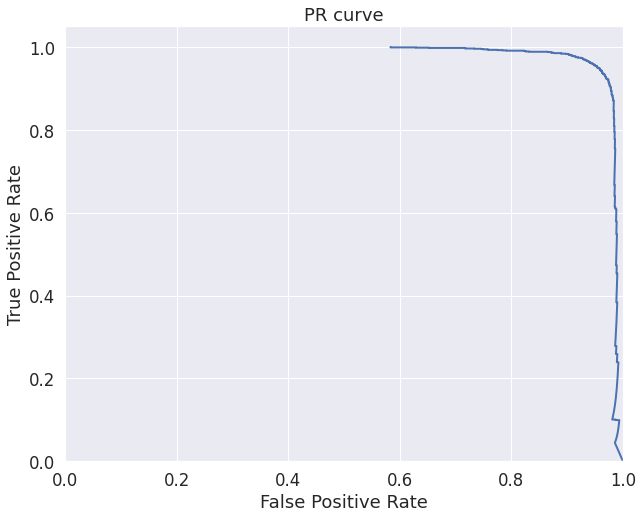

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = precision_recall_curve(y_test, svc.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='PR curve ')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('PR curve')
plt.savefig("PR.png")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score
print(f"ROC AUC score: {roc_auc_score(y_test, y_pred)}")
print(f"PR AUC score: {average_precision_score(y_test, y_pred)}")

ROC AUC score: 0.9529977405986814
PR AUC score: 0.932850707519412


Сравним теперь AUC-ROC и AUC-PR для вашей модели (SVC) с этими же метриками для случайного классификатора (RandomForestClassifier)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

lr = RandomForestClassifier()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(f"ROC AUC score: {roc_auc_score(y_test, y_pred)}")
print(f"PR AUC score: {average_precision_score(y_test, y_pred)}")


ROC AUC score: 0.9406968272813708
PR AUC score: 0.9170829377939935


Видим, что метод опорных векторов лучше подхдит для нашей задачи

А теперь проделайте все то же самое для логистической регрессии (LR) — обучение, подбор параметра регуляризации (используйте L2-регуляризацию), вычисление всех метрик и построение кривых. Сравните результаты LR и SVM с точки зрения всех вычисленных критериев качества, объясните различия (если они есть).

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
pipeline_regr = Pipeline(steps=[
    ('scaler', StandardScaler()),  
    ('regression', LogisticRegression())
])

grid_values = {'regression__C': Cs}
searcher = GridSearchCV(pipeline_regr, param_grid=grid_values, scoring='f1_macro', cv=5)
searcher.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regression', LogisticRegression())]),
             param_grid={'regression__C': array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540...
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])},
             scoring='f1_macro')

In [ ]:
searcher.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LogisticRegression(C=0.2442053094548651))])

In [ ]:
pipeline_svm = Pipeline(steps=[
    ('scaler', StandardScaler()),  
    ('svm', LogisticRegression(C=0.2442))
])
for metric in ['accuracy','precision', 'recall', 'f1_macro']:
    print(cross_val_score(pipeline_svm, X_test, y_test, scoring=metric, cv=5))

[0.78       0.76       0.785      0.77333333 0.78      ]
[0.77388535 0.75316456 0.80208333 0.76848875 0.78405316]
[0.79934211 0.78289474 0.76237624 0.78877888 0.77887789]
[0.77980182 0.75973304 0.78495161 0.77320986 0.77999022]


In [ ]:
LR = LogisticRegression(random_state=42, C=0.2442)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1], pos_label=1, )
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

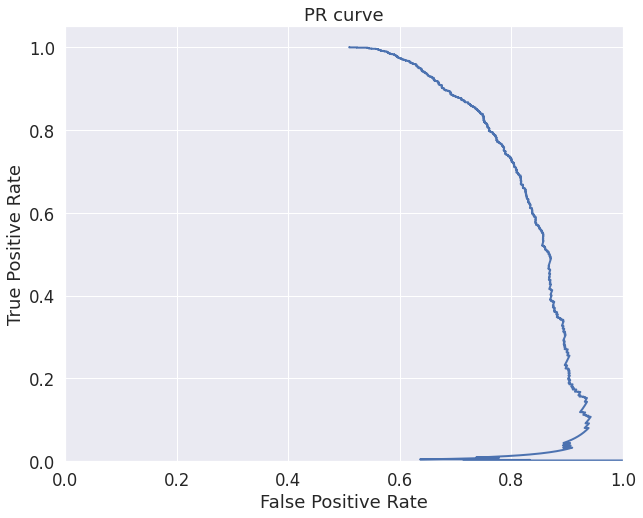

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = precision_recall_curve(y_test, LR.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='PR curve ')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('PR curve')
plt.savefig("PR.png")
plt.show()

In [ ]:
LR_y_pred = LR.predict(X_test)
SVC_y_pred = svc.predict(X_test)
print("Logistic Regression: ")
print(f"ROC AUC score: {roc_auc_score(y_test, LR_y_pred)}")
print(f"PR AUC score: {average_precision_score(y_test, LR_y_pred)}")
print("SVC: ")
print(f"ROC AUC score: {roc_auc_score(y_test, SVC_y_pred)}")
print(f"PR AUC score: {average_precision_score(y_test, SVC_y_pred)}")

Logistic Regression: 
ROC AUC score: 0.7713417412280956
PR AUC score: 0.7137645958062551
SVC: 
ROC AUC score: 0.9529977405986814
PR AUC score: 0.932850707519412


В названии метода опорных векторов присутствуют некоторые "опорные векторы". Сгенерируйте синтетические данные с помощью `make_classification` с 2 признаками, обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные векторы (атрибут `support_vectors_`). В этот раз, если необходимо, вместо `LinearSVC` воспользуйтесь `SVC(kernel='linear')`, так как только в нём есть информация об опорных векторах.

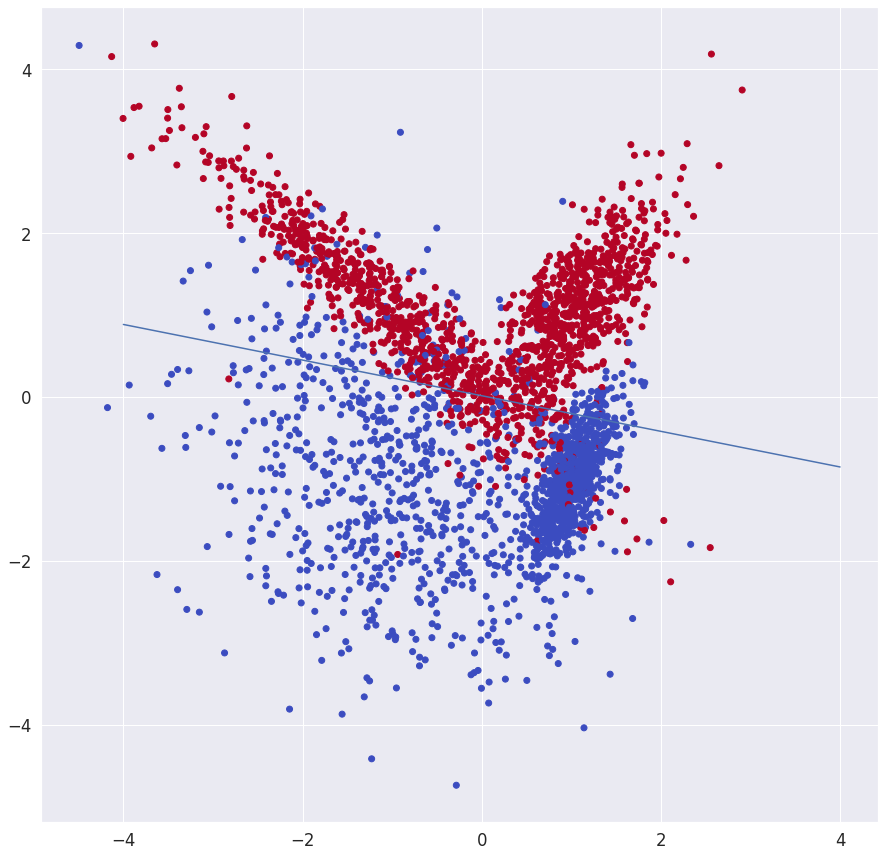

In [ ]:
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

x = np.linspace(-4,4,100)
w = -svc.coef_[0,0]/svc.coef_[0,1]
b = -svc.intercept_[0]/svc.coef_[0,1]

y = w*x+b

plt.figure(figsize=(15, 15))
plt.scatter(X_test[:,0],X_test[:,1],c=y_test, cmap="coolwarm")
plt.plot(x,y)

В отличие от метода опорных векторов, логистическая регрессия не пытается построить разделяющую гиперплоскость с максимальным отступом, а приближает в каждой точке пространства объектов вероятность положительных ответов $p(y=+1|x)$. Попробуйте нарисовать это распределение на плоскости, не забудьте отметить на ней все объекты. Вам может помочь функция `plt.pcolor`.

In [ ]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in
    
    Parameters
    ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional
        
    Returns
    -------
        xx, yy : ndarray
    """
    
    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.
    
    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), 
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): 
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)
    
    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False
        
    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors=\'k\', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, 
                   s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, 
                   s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        #     ax.set_title(title)
    if show:
        plt.figure(figsize=(20,20))
        plt.show()
    else:
        return ax

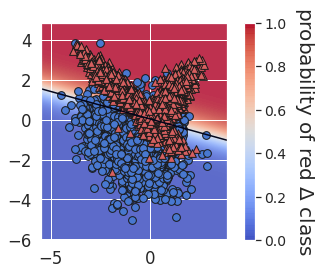

<Figure size 1440x1440 with 0 Axes>

Maximum predicted probability 0.9999989115886845


In [ ]:
# Set the regularization strength
model = LogisticRegression(C=100)

# Fit and plot
model.fit(X_train, y_train)
plot_classifier(X_train, y_train, model, proba=True)
# Predict probabilities on training points
prob = model.predict_proba(X_test)
print("Maximum predicted probability", np.max(prob))

__Задание 2.__ Калибровка вероятностей.

__(1 балл)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [ ]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l - r) / 2) 
        bin_real_ratios.append(np.min(y_test[(preds >= l) & (preds < r)] == 1)) 
    plt.figure(figsize=(6,6))
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.ylim([-0.05, 1.05])
    plt.grid()

Сгенерируйте синтетические данные аналогично использованным в самом первом задании. Постройте калибровочные кривые на тестовой части для логистической регрессии и метода опорных векторов (не забудьте перевести его предсказания в $[0;1]$). Изучите распределение ответов классификаторов (постройте гистограммы с помощью `plt.hist`). Чем они различаются? Чем вы можете объяснить это?

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

In [ ]:
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Class balance:', y.mean())

Class balance: 0.4998


In [ ]:
SVC = SVC(kernel='linear', max_iter=100000, C=0.1).fit(X_train, y_train)
svc_pred = SVC.decision_function(X_test)
print('SVC ROC-AUC:', roc_auc_score(y_test, svc_pred))

lr = LogisticRegression(max_iter=100000, C=0.1).fit(X_train, y_train)
lr_pred = lr.decision_function(X_test)
print('Logistic regression ROC-AUC:', roc_auc_score(y_test, lr_pred))

SVC ROC-AUC: 0.9455151681078622
Logistic regression ROC-AUC: 0.9462013952099215


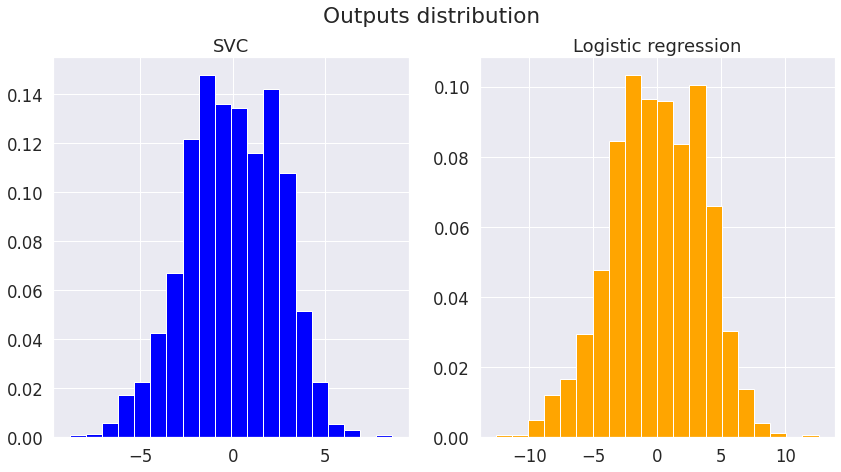

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

axs[0].hist(svc_pred, bins=20, color='blue', density='True')
axs[1].hist(lr_pred, bins=20, color='orange', density='True')

axs[0].set_title('SVC')
axs[1].set_title('Logistic regression')

plt.suptitle('Outputs distribution')
plt.show()

In [ ]:
svc_pred = (svc_pred - svc_pred.min()) / (svc_pred.max() - svc_pred.min())
lr_pred = lr.predict_proba(X_test)[:, 1]

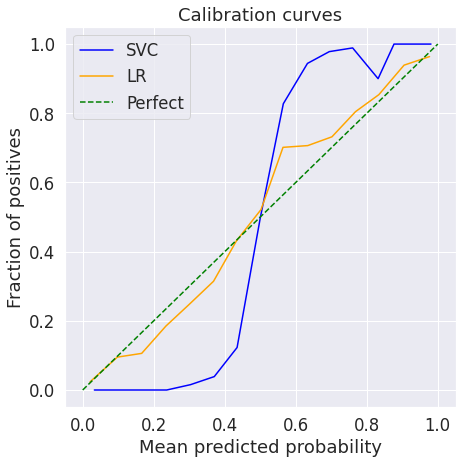

In [ ]:
plt.figure(figsize=(7, 7))

svc_true_prob, svc_pred_prob = calibration_curve(y_test, svc_pred, n_bins=15)
lr_true_prob, lr_pred_prob = calibration_curve(y_test, lr_pred, n_bins=15)

plt.plot(svc_pred_prob, svc_true_prob, label='SVC', color='blue')
plt.plot(lr_pred_prob, lr_true_prob, label='LR', color='orange')
plt.plot([0, 1], [0, 1], label='Perfect', linestyle='--', color='green')

plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curves')
plt.legend()
plt.show()

Воспользуйтесь `CalibratedClassifierCV` из `sklearn` для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

In [ ]:
sigmoid_svc = CalibratedClassifierCV(svc, cv=3, method='sigmoid').fit(X_train, y_train)
sigmoid_svc_pred = sigmoid_svc.predict_proba(X_test)[:, 1]
print('SVC ROC-AUC:', roc_auc_score(y_test, sigmoid_svc_pred))

sigmoid_lr = CalibratedClassifierCV(lr, cv=3, method='sigmoid').fit(X_train, y_train)
sigmoid_lr_pred = sigmoid_lr.predict_proba(X_test)[:, 1]
print('Logistic regression ROC-AUC:', roc_auc_score(y_test, sigmoid_lr_pred))

SVC ROC-AUC: 0.9455662795824327
Logistic regression ROC-AUC: 0.946130728040733


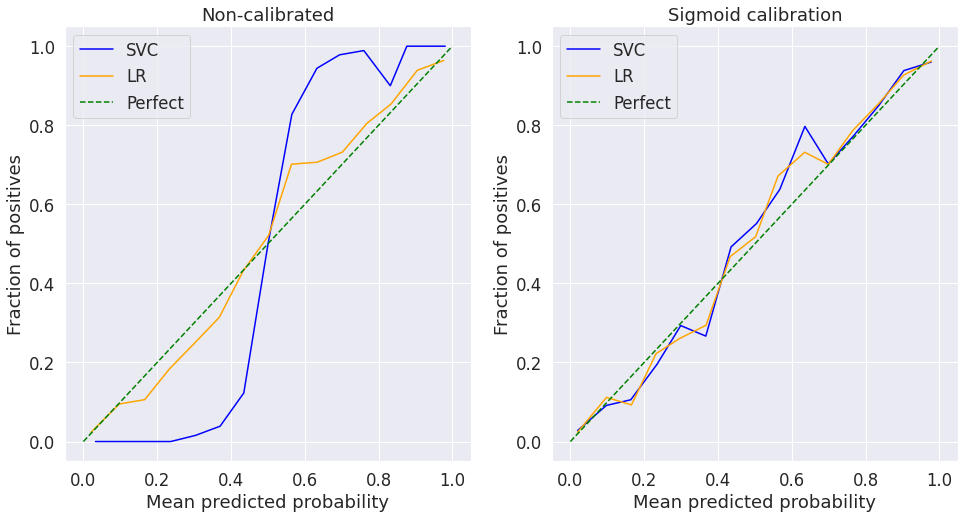

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

svc_true_prob, svc_pred_prob = calibration_curve(y_test, svc_pred, n_bins=15)
lr_true_prob, lr_pred_prob = calibration_curve(y_test, lr_pred, n_bins=15)

axs[0].plot(svc_pred_prob, svc_true_prob, label='SVC', color='blue')
axs[0].plot(lr_pred_prob, lr_true_prob, label='LR', color='orange')
axs[0].plot([0, 1], [0, 1], label='Perfect', linestyle='--', color='green')
axs[0].set_title('Non-calibrated')

svc_true_prob, svc_pred_prob = calibration_curve(y_test, sigmoid_svc_pred, n_bins=15)
lr_true_prob, lr_pred_prob = calibration_curve(y_test, sigmoid_lr_pred, n_bins=15)

axs[1].plot(svc_pred_prob, svc_true_prob, label='SVC', color='blue')
axs[1].plot(lr_pred_prob, lr_true_prob, label='LR', color='orange')
axs[1].plot([0, 1], [0, 1], label='Perfect', linestyle='--', color='green')
axs[1].set_title('Sigmoid calibration')

for ax in axs:
    ax.set_xlabel('Mean predicted probability')
    ax.set_ylabel('Fraction of positives')
    ax.legend()

plt.show()

__Бонусное задание (0.5 балла).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты. Ключевые слова для вдохновения: `Platt`, `Isotonic`.

In [ ]:
#your code here

# Часть 1. Работа с переменными.

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Подготовка данных.__

Загрузим данные [UCI Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing). Этот датасет содержит информацию о банковском телефонном маркетинге, объектом в нем является телефонный звонок потенциальному клиенту с предложением некоторой услуги (утверждается, что это краткосрочный депозит), целевой переменной - ответ клиента (согласился ли он открыть депозит?). В качестве признакового описания используются характеристики клиента (образование, брак и т.д.), данные о звонке и различные экономические индикаторы - более подробная информация представлена в файле `bank-additional-names.txt`.

In [ ]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

In [ ]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

__Задание 3 (0.5 балла).__ Разделите выборку на обучающую и тестовую в соотношении 3:1. Зафиксируйте `random_state=777`, также используйте `stratify`. Один из столбцов в данных не несет информации для решения задачи — какой? Отбросьте его. 



Столбец 11 не несет информации для решения информации (см. bank-additional-names.txt). Приведем выдержку из описания: "11 - duration: продолжительность последнего контакта в секундах (числовая). Важное примечание: этот атрибут сильно влияет на цель вывода (например, если длительность =0, то y="нет"). Тем не менее, продолжительность не известна до выполнения вызова. Кроме того, после окончания вызова y, очевидно, известен. Таким образом, эти входные данные должны быть включены только для целей сравнения и должны быть отброшены, если цель состоит в том, чтобы иметь реалистичную прогностическую модель."

Соответственно, удалим столбец duration

In [ ]:
X = df.drop(columns=['y','duration'])
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=777, stratify=y)

Закодируйте категориальные признаки с помощью `OrdinalEncoder`. Посчитайте качество (в этом задании будем работать c `AUC-PR`) при применении логистической регрессии. Замерьте время, потребовавшееся на обучение модели (с учетом кодирования признаков).

__Вопрос__: почему в данном задании мы выбрали метрикой именно `AUC-PR`, а не, к примеру, `AUC-ROC`?

__Ваш ответ__:

In [ ]:
cols = df.columns
num_cols = df._get_numeric_data().columns
ctg_cols = list(set(cols) - set(num_cols))
print("Categorical columns: ", ctg_cols)

Categorical columns:  ['job', 'default', 'housing', 'day_of_week', 'month', 'loan', 'contact', 'education', 'poutcome', 'marital', 'y']


In [ ]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from datetime import datetime as dt

start = dt.now()
enc = OrdinalEncoder()
df[ctg_cols] = enc.fit_transform(df[ctg_cols])

X = df.drop(columns=['y','duration'])
y = df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=777, stratify=y)

lr = LogisticRegression()
lr.fit(X_train, y_train)
stop = dt.now()
y_pred = lr.predict(X_test)
print("Logistic Regression: ")
print(f"PR AUC score: {average_precision_score(y_test, y_pred)}")
print(f"ROC AUC score: {roc_auc_score(y_test, y_pred)}")
print(f"Training time: {(stop-start).microseconds} sec")

Logistic Regression: 
PR AUC score: 0.22311969744890936
ROC AUC score: 0.5907461730763794
Training time: 742779 sec


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


__Задание 4 (0.5 балла).__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на кодирование категориальных признаков и обучение модели.



In [ ]:
ctg_cols.remove('y')
enc = OrdinalEncoder()
df['y'] = enc.fit_transform(df['y'].to_numpy().reshape(-1,1))

In [ ]:
from datetime import datetime as dt

start = dt.now()
df_transform = pd.get_dummies(df, columns=ctg_cols)
df_transform.head(10)

X = df_transform.drop(columns=['y','duration'])
y = df_transform.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=777, stratify=y)

lr = LogisticRegression()
lr.fit(X_train, y_train)
stop = dt.now()
y_pred = lr.predict(X_test)
print("Logistic Regression: ")
print(f"PR AUC score: {average_precision_score(y_test, y_pred)}")
print(f"ROC AUC score: {roc_auc_score(y_test, y_pred)}")
print(f"Training time: {(stop-start).microseconds} sec")

Logistic Regression: 
PR AUC score: 0.23144778449994835
ROC AUC score: 0.6048733513901233
Training time: 990527 sec


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирования категориальных признаков — mean-target encoding (для простоты будем называть это счётчиками). Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 5 (1 балл).__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущими экспериментами (с учетом кодирования признаков). Заметили ли вы что-то интересное?


__Бонус (1 балл)__: Здесь и далее реализуйте вычисление счетчиков с помощью трансформера (наследуйтесь от классов `BaseEstimator, TransformerMixin` из `sklearn.base`). Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики нужно считать только по обучающей выборке в методе `fit`. Ваш трансформер должен принимать при инициализации список из категориальных признаков и изменять только их. 


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None):
        if isinstance(cols, str):
            self.cols = [cols]
        else:
            self.cols = cols
        
    def fit(self, X, y):
        # Encode all categorical cols by default
        if self.cols is None:
            self.cols = [col for col in X 
                         if str(X[col].dtype)=='object']

        # Check columns are in X
        for col in self.cols:
            if col not in X:
                raise ValueError('Column \''+col+'\' not in X')

        # Encode each element of each column
        self.maps = dict() #dict to store map for each column
        for col in self.cols:
            tmap = dict()
            uniques = X[col].unique()
            for unique in uniques:
                tmap[unique] = y[X[col]==unique].mean()
            self.maps[col] = tmap
            
        return self

    def transform(self, X, y=None):
        Xo = X.copy()
        for col, tmap in self.maps.items():
            vals = np.full(X.shape[0], np.nan)
            for val, mean_target in tmap.items():
                vals[X[col]==val] = mean_target
            Xo[col] = vals
        return Xo
                     
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X, y)

In [ ]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
enc = OrdinalEncoder()
df['y'] = enc.fit_transform(df['y'].to_numpy().reshape(-1,1))

In [ ]:
X = df.drop(columns=['y','duration'])
y = df.y

start = dt.now()
te = TargetEncoder(ctg_cols)
X_target_encoded = te.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_target_encoded, y, test_size=0.33, random_state=777, stratify=y)

lr = LogisticRegression()
lr.fit(X_train, y_train)
stop = dt.now()
y_pred = lr.predict(X_test)
print("Logistic Regression: ")
print(f"PR AUC score: {average_precision_score(y_test, y_pred)}")
print(f"ROC AUC score: {roc_auc_score(y_test, y_pred)}")
print(f"Training time: {(stop-start).microseconds} sec")

Logistic Regression: 
PR AUC score: 0.22065817157424872
ROC AUC score: 0.5873245958368157
Training time: 995166 sec


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Заметили, что время на обучение и на кодирование уменьшилось во много раз без потери качества!

OrdinalEncoder - Training time: 842 102 sec

OneHotEncoder - Training time: 709 816 sec

MeanTargetEncoder - Training time: 99 852 sec

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__Задание 6.__ Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (постарайтесь найти баланс между борьбой с переобучением и сохранением полезности признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.

__(0.5 балла)__

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
enc = OrdinalEncoder()
df['y'] = enc.fit_transform(df['y'].to_numpy().reshape(-1,1))

__(Бонусная часть, 0.5 балла)__ Посчитайте корректные счётчики первым или вторым способов из описанных выше (не забудьте добавить и шум). 



In [ ]:
from sklearn.model_selection import KFold

In [ ]:
class TargetEncoderCV(TargetEncoder):

    def __init__(self, n_splits=3, shuffle=True, cols=None):
        self.n_splits = n_splits
        self.shuffle = shuffle
        self.cols = cols
        

    def fit(self, X, y):

        self._target_encoder = TargetEncoder(cols=self.cols)
        self._target_encoder.fit(X, y)
        return self

    
    def transform(self, X, y=None):
        # Use target encoding from fit() if this is test data
        if y is None:
            return self._target_encoder.transform(X)

        # Compute means for each fold
        self._train_ix = []
        self._test_ix = []
        self._fit_tes = []
        kf = KFold(n_splits=self.n_splits, shuffle=self.shuffle)
        for train_ix, test_ix in kf.split(X):
            self._train_ix.append(train_ix)
            self._test_ix.append(test_ix)
            te = TargetEncoder(cols=self.cols)
            if isinstance(X, pd.DataFrame):
                self._fit_tes.append(te.fit(X.iloc[train_ix,:],
                                            y.iloc[train_ix]))
            elif isinstance(X, np.ndarray):
                self._fit_tes.append(te.fit(X[train_ix,:],
                                            y[train_ix]))
            else:
                raise TypeError('X must be DataFrame or ndarray')

        # Apply means across folds
        Xo = X.copy()
        for ix in range(len(self._test_ix)):
            test_ix = self._test_ix[ix]
            if isinstance(X, pd.DataFrame):
                Xo.iloc[test_ix,:] = \
                    self._fit_tes[ix].transform(X.iloc[test_ix,:])
            elif isinstance(X, np.ndarray):
                Xo[test_ix,:] = \
                    self._fit_tes[ix].transform(X[test_ix,:])
            else:
                raise TypeError('X must be DataFrame or ndarray')
        return Xo

            
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X, y)

In [ ]:
X = df.drop(columns=['y','duration'])
y = df.y

start = dt.now()
te = TargetEncoderCV()
X_target_encoded = te.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_target_encoded, y, test_size=0.33, random_state=777, stratify=y)

lr = LogisticRegression()
lr.fit(X_train, y_train)
stop = dt.now()
y_pred = lr.predict(X_test)
print("Logistic Regression: ")
print(f"PR AUC score: {average_precision_score(y_test, y_pred)}")
print(f"ROC AUC score: {roc_auc_score(y_test, y_pred)}")
print(f"Training time: {(stop-start).microseconds} sec")

Logistic Regression: 
PR AUC score: 0.22065817157424872
ROC AUC score: 0.5873245958368157
Training time: 398511 sec


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — доля объектов положительного класса в выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значением. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!


__Задание 7 (1 балл).__ Добавьте сглаживание, описанное выше и повторите эксперименты.

In [ ]:
#your code here

__Задание 8 (0.5 балла).__ В данных имеется признак "возраст клиента". Сейчас мы интерпретируем его как числовой, что в общем случае для линейной модели может быть неверной гипотезой. Тем не менее, у этого признака есть довольно много уникальных значений (сколько?), поэтому применять к нему one-hot кодирование может оказаться излишним. Попробуйте закодировать возраст с помощью счетчиков. Стало ли лучше?



In [ ]:
print(f"Уникальных значений возраста: {len(df.age.unique())}")


Уникальных значений возраста: 78


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
enc = OrdinalEncoder()
df['y'] = enc.fit_transform(df['y'].to_numpy().reshape(-1,1))

In [ ]:
X = df.drop(columns=['y','duration'])
y = df.y

ctg_cols.append("age")

start = dt.now()
te = TargetEncoder(ctg_cols)
X_target_encoded = te.fit_transform(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_target_encoded, y, test_size=0.33, random_state=777, stratify=y)

lr = LogisticRegression()
lr.fit(X_train, y_train)
stop = dt.now()
ctg_cols.remove("age")
y_pred = lr.predict(X_test)
print("Logistic Regression: ")
print(f"PR AUC score: {average_precision_score(y_test, y_pred)}")
print(f"ROC AUC score: {roc_auc_score(y_test, y_pred)}")
print(f"Training time: {(stop-start).microseconds} sec")

Logistic Regression: 
PR AUC score: 0.22065817157424872
ROC AUC score: 0.5873245958368157
Training time: 188932 sec


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Лучше не стало, попробуем другой вариант

Можно пойти и в обратную сторону. У нас есть признаки "месяц и день недели" для звонка. Попробуйте интерпретировать их как числовые (месяц от 0 до 12, дни недели от 0 до 4). Стало ли лучше в этот раз?

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
enc = OrdinalEncoder()
df['y'] = enc.fit_transform(df['y'].to_numpy().reshape(-1,1))
df['month'] = enc.fit_transform(df['month'].to_numpy().reshape(-1,1))
df['day_of_week'] = enc.fit_transform(df['day_of_week'].to_numpy().reshape(-1,1))

In [ ]:
ctg_cols.remove("month")
ctg_cols.remove("day_of_week")

In [ ]:
X = df.drop(columns=['y','duration'])
y = df.y

ctg_cols.append("age")

start = dt.now()
te = TargetEncoder(ctg_cols)
X_target_encoded = te.fit_transform(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_target_encoded, y, test_size=0.33, random_state=777, stratify=y)

lr = LogisticRegression()
lr.fit(X_train, y_train)
stop = dt.now()
ctg_cols.remove("age")
y_pred = lr.predict(X_test)
print("Logistic Regression: ")
print(f"PR AUC score: {average_precision_score(y_test, y_pred)}")
print(f"ROC AUC score: {roc_auc_score(y_test, y_pred)}")
print(f"Training time: {(stop-start).microseconds} sec")

Logistic Regression: 
PR AUC score: 0.22717669969718673
ROC AUC score: 0.595147502112155
Training time: 955711 sec


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Улучшилось, но незначительно

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием вы заметили.

__Ответ:__ 

# Часть 2. Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тем же данным про банковский телефонный маркетинг.

In [ ]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
# X = df.drop(columns=['duration', 'y'])
# y = (df.y == 'yes')

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

Как вы помните, в данных много категориальных признаков (сейчас давайте интерпретировать возраст как числовой). Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — `AUC-PR`. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [ ]:
cols = df.columns
num_cols = df._get_numeric_data().columns
ctg_cols = list(set(cols) - set(num_cols))
print("Categorical columns: ", ctg_cols)

Categorical columns:  ['job', 'default', 'housing', 'day_of_week', 'month', 'loan', 'contact', 'education', 'poutcome', 'marital', 'y']


In [ ]:
ctg_cols.remove('y')
enc = OrdinalEncoder()
df['y'] = enc.fit_transform(df['y'].to_numpy().reshape(-1,1))

In [ ]:
from datetime import datetime as dt

start = dt.now()
df_transform = pd.get_dummies(df, columns=ctg_cols)

X = df_transform.drop(columns=['y','duration'])
y = df_transform.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

lr = LogisticRegression()
lr.fit(X_train, y_train)
stop = dt.now()
y_pred = lr.predict(X_test)
print("Logistic Regression: ")
print(f"PR AUC score: {average_precision_score(y_test, y_pred)}")
print(f"Training time: {(stop-start).microseconds} sec")

Logistic Regression: 
PR AUC score: 0.23565280128217803
Training time: 133403 sec


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print(f"Количество колонок после One-Hot кодирования: {len(df_transform.columns)}")

Количество колонок после One-Hot кодирования: 64


### Встроенные методы

Допустим, мы хотим оставить только 40 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded method, так как он заложен в особенности модели.

__Задание 8 (0.5 балла).__ Оставьте 40 признаков с наибольшим модулем соответствующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков.

Изменилось ли качество? Как?



In [ ]:
coefs = flatlist = [element for sub_list in lr.coef_.tolist() for element in sub_list]

sorted_features = sorted(list(zip(X.columns, coefs)), key=lambda x: abs(x[1]))
sorted_features_names = [x[0] for x in sorted_features]
print("Признаки с наименьшим модулем веса:\n")
sorted_features_names[:22]

Признаки с наименьшим модулем веса:



['job_unknown',
 'default_yes',
 'education_illiterate',
 'marital_unknown',
 'job_unemployed',
 'pdays',
 'marital_divorced',
 'day_of_week_fri',
 'job_housemaid',
 'job_management',
 'housing_unknown',
 'loan_unknown',
 'age',
 'job_entrepreneur',
 'job_self-employed',
 'education_professional.course',
 'housing_yes',
 'nr.employed',
 'month_dec',
 'poutcome_success',
 'month_sep',
 'loan_yes']

In [ ]:
bad_ftr_list = []
for feature in sorted_features[:22]:
  bad_ftr_list.append(feature[0])

df_transform_40 = df_transform.drop(columns=bad_ftr_list)

In [ ]:
X = df_transform_40.drop(columns=['y','duration'])
y = df_transform_40.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

lr = LogisticRegression()
lr.fit(X_train, y_train)
stop = dt.now()
y_pred = lr.predict(X_test)
print("Logistic Regression: ")
print(f"PR AUC score: {average_precision_score(y_test, y_pred)}")
print(f"Training time: {(stop-start).microseconds} sec")

Logistic Regression: 
PR AUC score: 0.23354621688897553
Training time: 117913 sec


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Точность немного просела в 4 знаке после запятой

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отмасштабируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

Вопрос на засыпку: one-hot кодирование возвращает нам единичные признаки-индикаторы. Попробуйте также отскалировать их, как и обычные числовые, и снова выбрать 40 главных по вкладу признаков. Изменился ли их список? Изменится ли качество?

In [ ]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Определим категориальные признаки
cols = df.columns
num_cols = df._get_numeric_data().columns
ctg_cols = list(set(cols) - set(num_cols))

# Применим One-Hot кодирование к кат. признакам
ctg_cols.remove('y')
enc = OrdinalEncoder()
df['y'] = enc.fit_transform(df['y'].to_numpy().reshape(-1,1))
df_transform = pd.get_dummies(df, columns=ctg_cols)

# start = dt.now()
X = df_transform.drop(columns=['y','duration'])
y = df_transform.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

# Отмасштабируем признаки
scaler = StandardScaler().fit(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
stop = dt.now()
y_pred = lr.predict(X_test)
print("Logistic Regression: ")
print(f"PR AUC score: {average_precision_score(y_test, y_pred)}")
print(f"Training time: {(stop-start).microseconds} sec")

Logistic Regression: 
PR AUC score: 0.24661894332259238
Training time: 115544 sec


In [ ]:
coefs = flatlist = [element for sub_list in lr.coef_.tolist() for element in sub_list]
 
sorted_features_scale = sorted(list(zip(X.columns, coefs)), key=lambda x: abs(x[1]))
sorted_features_scale_names = [x[0] for x in sorted_features]
print("Признаки с наименьшим модулем веса:\n")
sorted_features_scale_names[:22]

Признаки с наименьшим модулем веса:



['job_unknown',
 'default_yes',
 'education_illiterate',
 'marital_unknown',
 'job_unemployed',
 'pdays',
 'marital_divorced',
 'day_of_week_fri',
 'job_housemaid',
 'job_management',
 'housing_unknown',
 'loan_unknown',
 'age',
 'job_entrepreneur',
 'job_self-employed',
 'education_professional.course',
 'housing_yes',
 'nr.employed',
 'month_dec',
 'poutcome_success',
 'month_sep',
 'loan_yes']

In [ ]:
list(set(sorted_features_scale_names[:22]) - set(sorted_features_names[:22]))

[]

Пересчитаем снова качество уже на 40-ка признаках

In [ ]:
df_transform_scale = df_transform.drop(columns=sorted_features_scale_names[:22])

In [ ]:
# start = dt.now()
X = df_transform_scale.drop(columns=['y','duration'])
y = df_transform_scale.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

# Отмасштабируем признаки
scaler = StandardScaler().fit(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
stop = dt.now()
y_pred = lr.predict(X_test)
print("Logistic Regression: ")
print(f"PR AUC score: {average_precision_score(y_test, y_pred)}")
print(f"Training time: {(stop-start).microseconds} sec")

Logistic Regression: 
PR AUC score: 0.24195906442603748
Training time: 884278 sec


Как видим признаки не изменились. Качество не намного увеличилось

### Методы фильтрации


Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(j) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu$, $\sigma$, $n$ соответственно среднее, стандартное отклонение и количество объектов каждого из классов.

__Задание 9 (0.5 балла).__ Оставьте 40 признаков с наибольшим значением $t$ и замерьте качество. Не забудьте замерить скорость отбора признаков в этом случае.



In [ ]:
X = df_transform.drop(columns=['y','duration'])
y = df_transform.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

In [ ]:
a = list(zip(X_test.to_numpy(), y_test))

In [ ]:
pos = []
neg = []
for x in a:
  if x[1] == 0:
    neg.append(x[0])
  else:
    pos.append(x[0])

In [ ]:
from scipy.stats import ttest_ind

tval2, pval2 = ttest_ind(pos, neg) 
sorted_features_tt = sorted(list(zip(X.columns, tval2.tolist())), key=lambda x: abs(x[1]))
sorted_features_tt_names = [x[0] for x in sorted_features_tt]
print("Признаки с наименьшим модулем веса:\n")
sorted_features_tt_names[:21]

Признаки с наименьшим модулем веса:



['education_high.school',
 'education_professional.course',
 'job_unknown',
 'marital_unknown',
 'month_jun',
 'education_basic.4y',
 'day_of_week_thu',
 'housing_unknown',
 'loan_unknown',
 'job_management',
 'day_of_week_mon',
 'day_of_week_wed',
 'loan_yes',
 'loan_no',
 'job_housemaid',
 'job_technician',
 'day_of_week_tue',
 'month_nov',
 'job_self-employed',
 'housing_yes',
 'month_aug']

In [ ]:
list(set(sorted_features_names[:21]) - set(sorted_features_tt_names[:21]))

['job_entrepreneur',
 'job_unemployed',
 'day_of_week_fri',
 'month_dec',
 'nr.employed',
 'default_yes',
 'month_sep',
 'pdays',
 'marital_divorced',
 'poutcome_success',
 'education_illiterate',
 'age']

In [ ]:
df_transform_40_tt = df_transform.drop(columns=sorted_features_tt_names[:21])

In [ ]:
# start = dt.now()
X = df_transform_40_tt.drop(columns=['y','duration'])
y = df_transform_40_tt.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

lr = LogisticRegression()
lr.fit(X_train, y_train)
stop = dt.now()
y_pred = lr.predict(X_test)
print("Logistic Regression: ")
print(f"PR AUC score: {average_precision_score(y_test, y_pred)}")
print(f"Training time: {(stop-start).microseconds} sec")

Logistic Regression: 
PR AUC score: 0.23135238054490173
Training time: 993527 sec


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Методы-обёртки

__Задание 10 (1 балл).__ 

Третий из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не окажется выполненым некоторое условие (количество признаков или ухудшение качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите обучающую выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только для финальной оценки качества.

Снова оставьте только 40 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [ ]:
# Список колонк для обучения
list_col = list(df_transform.columns)
list_col.remove("duration")
list_col.remove("y")

In [ ]:
# Создаем глобальную тренировчную и тестовую выборки
X = df_transform.drop(columns=['y','duration'])
y = df_transform.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)



In [ ]:
# Проходим ленивым алгоритмом по каждому из признаков, замеряя точность на выборке без одного признака
without_ftr = []
for ftr in list_col:
    X_without_ftr = X_train.drop(columns=[ftr])
   
    X_train_train, X_test_train, y_train_train, y_test_train = train_test_split(X_train, y_train, test_size=0.2, random_state=777, stratify=y_train)  

    lr = LogisticRegression(solver='lbfgs')
    lr.fit(X_train_train, y_train_train)
    
    y_pred = lr.predict(X_test_train)
    score = average_precision_score(y_test_train, y_pred)
    without_ftr.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# Посмотрим на точность без каждого из указанных признаков и отберем где точность самая высокая
col_for_drop = []
for x in sorted(list(zip(without_ftr, list_col)), reverse=True)[:21]:
  col_for_drop.append(x[1])


In [ ]:
# Выкинем признаки, без которых точность была наилучшей, обучим модель заново
X = X_train.drop(columns=col_for_drop)
X_test_new = X_test.drop(columns=col_for_drop)

lr = LogisticRegression()
lr.fit(X, y_train)
y_pred = lr.predict(X_test_new)
print("Logistic Regression: ")
print(f"PR AUC score: {average_precision_score(y_test, y_pred)}")

Logistic Regression: 
PR AUC score: 0.16109227319151787


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Стоит отметить, что с помощью такого метода можно пойти и в обратную сторону. Попробуйте _добавлять_ по одному самому полезному признаку в выборку до тех пор, пока не наберется 40 штук. Найдется ли порог, при котором добавление следующих признаков будет только ухудшать качество модели?

In [ ]:
col_for_add = []
for x in sorted(list(zip(without_ftr, list_col)))[:40]:
  col_for_add.append(x[1])

In [ ]:
with_ftr = []
for i, ftr in enumerate(col_for_add):
  if i == 0:
    X_with_ftr = X_train[col_for_add[:2]]
  else:
    X_with_ftr = X_train[col_for_add[:i+2]]
  
  X_train_train, X_test_train, y_train_train, y_test_train = train_test_split(X_with_ftr, y_train, test_size=0.2, random_state=777, stratify=y_train)  
  lr = LogisticRegression(solver='lbfgs')
  lr.fit(X_train_train, y_train_train)
  
  y_pred = lr.predict(X_test_train)
  score = average_precision_score(y_test_train, y_pred)
  with_ftr.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
with_ftr

[0.1125948406676783,
 0.1125948406676783,
 0.1125948406676783,
 0.1125948406676783,
 0.1125948406676783,
 0.1125948406676783,
 0.1125948406676783,
 0.1125948406676783,
 0.1125948406676783,
 0.1125948406676783,
 0.1125948406676783,
 0.1125948406676783,
 0.1125948406676783,
 0.1125948406676783,
 0.1125948406676783,
 0.1125948406676783,
 0.1125948406676783,
 0.1125948406676783,
 0.1125948406676783,
 0.1125948406676783,
 0.1125948406676783,
 0.13124064865697416,
 0.13125676626071434,
 0.1348644211800102,
 0.13314644820547608,
 0.1348644211800102,
 0.1336684573534168,
 0.13400132521299526,
 0.13262444413253352,
 0.13382040795912695,
 0.13382040795912695,
 0.13490877344629457,
 0.1324135072621324,
 0.13427854049448656,
 0.13990975054092414,
 0.14078533327280432,
 0.14163011157077043,
 0.14203255689293917,
 0.14010417305754724,
 0.14010417305754724]

Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ:** 

# Часть 3. Оценка экономического эффекта модели

В данной части мы займемся тем, что от вас скорее всего потребуется на реальной работе (помимо перекладки `json`, разумеется). А именно: мы соберем несколько специализированных метрик качества, попытаемся настроить модель на максимизацию _прибыли_ и оценим, сколько вообще получится заработать на этом. Разумеется, здесь будет сделано множество упрощающих жизнь допущений, но обо всем по порядку. 

__Задание 11 (1 балл).__ Допустим, работники вашего колл-центра получают за один звонок клиенту 1 доллар. При согласии клиента на предлагаемые условия он принесет в банк 10 долларов.

Если вы всё прослушали на экономике, то напомним, что выручка — это сколько денег нам принесли клиенты, а прибыль — выручка за вычетом расходов на зарплату и прочее.

Загрузите данные о телемаркетинге из предыдущего блока заданий. В этой части не нужно делить выборку - мы будем использовать кросс-валидацию. Используйте 5 фолдов, сделайте `shuffle=True, random_state=500`. По кросс-валидации у вас получится 5 вариантов обучающей и тестовой выборки. Обучите логистическую регрессию на каждой обучающей выборке (воспользуйтесь one-hot для категориальных признаков, гиперпараметры оставьте со значениями по умолчанию) и сделайте предсказания для соответствующих тестовых выборок. Допустим, всем положительным прогнозам ваши сотрудники решили позвонить. Посчитайте на всех тестовых выборках выручку и усредните. Сколько денег вы в среднем заработаете? Также вычислите стандартное отклонение.

Сколько из заработанных денег придётся отдать операторам вашего колл-центра?

In [ ]:
X = df_transform.drop(columns=['y','duration'])
y = df_transform.y

# Определим категориальные признаки
cols = X.columns
num_cols = X._get_numeric_data().columns
ctg_cols = list(set(cols) - set(num_cols))

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=500)

list_scores = []
list_predict = []
for train_index, test_index in kf.split(X, y):
  # X_train, X_test = X[train_index], X[test_index]
  # y_train, y_test = y[train_index], y[test_index]
  X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
  y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]


  lr = LogisticRegression(solver='lbfgs')
  lr.fit(X_train, y_train)
  
  y_pred = lr.predict(X_test)
  score = average_precision_score(y_test, y_pred)
  list_scores.append(score)
  list_predict.append(y_pred)
list_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.26714110125827073,
 0.21693470340293108,
 0.2237585646774602,
 0.2278080357903619,
 0.20842667944874527]

In [ ]:
list_outcome = []
for pred in list_predict:
  list_outcome.append(pred.sum() * 10)

print(f"Средняя прибыль: {np.array(list_outcome).mean()}")
print(f"Стандартное отклонение: {np.array(list_outcome).std()}")

Средняя прибыль: 2676.0
Среднее отклонение: 213.6913662270893


In [ ]:
list_outcome

Внесем некоторую долю случайности. Пусть теперь согласный на условия клиент будет приносить не 10 долларов, а случайную величину, равномерно распределенную в интервале $[0;20)$. Проделайте все те же самые действия. Для имитации реальной ситуации **НЕ** фиксируйте `random_seed` при подсчете выручки с клиента. Что получилось?

In [ ]:
list_outcome = []
for pred in list_predict:
  list_outcome.append(pred.sum() * np.random.randint(0, 20))

print(f"Средняя прибыль: {np.array(list_outcome).mean()}")
print(f"Стандартное отклонение: {np.array(list_outcome).std()}")


Средняя прибыль: 2134.2
Стандартное отклонение: 1695.5604855032452


Настройте по кросс-валидации коэффициент регуляризации модели для максимизации прибыли (считайте как случайную величину выше). Удалось ли получить какой-то выигрыш? При каком коэффициенте регуляризациии прибыль максимальна? Постройте график зависимости ожидаемой прибыли от коэффициента, также укажите стандартные отклонения (вам поможет `plt.errorbar`).

In [ ]:
pipeline_regr = Pipeline(steps=[
    ('scaler', StandardScaler()),  
    ('regression', LogisticRegression())
])

grid_values = {'regression__C': Cs}
searcher = GridSearchCV(pipeline_regr, param_grid=grid_values, scoring='f1_macro', cv=5)
searcher.fit(X_train, y_train)

In [ ]:
searcher.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LogisticRegression(C=0.01))])

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=500)

list_scores = []
list_predict = []
for train_index, test_index in kf.split(X, y):
  # X_train, X_test = X[train_index], X[test_index]
  # y_train, y_test = y[train_index], y[test_index]
  X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
  y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]


  lr = LogisticRegression(solver='lbfgs', C=0.01)
  lr.fit(X_train, y_train)
  
  y_pred = lr.predict(X_test)
  score = average_precision_score(y_test, y_pred)
  list_scores.append(score)
  list_predict.append(y_pred)
list_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.2479171160131996,
 0.21824770464784987,
 0.22154029170453954,
 0.22942684094802585,
 0.20525632441377742]

In [ ]:
list_outcome = []
for pred in list_predict:
  list_outcome.append(pred.sum() * np.random.randint(0, 20))

print(f"Средняя прибыль: {np.array(list_outcome).mean()}")
print(f"Стандартное отклонение: {np.array(list_outcome).std()}")


Средняя прибыль: 3118.4
Стандартное отклонение: 1131.7976144169947


Попробуйте запустить перебор несколько раз. Находится ли каждый раз один и тот же "лучший" коэффициент? Присутствует ли какая-то закономерность? Какие вы можете сделать из этого выводы?

In [ ]:
#your code here

__Задание 12 (1 балл).__ Выше мы уже описали примерную экономическую модель вашей задачи. Как вы считаете, что для вашего бизнеса важнее — хороший precision или recall модели? Почему?

__Ответ:__



Вспомним, что на самом деле логистическая регрессия предсказывает нам вероятности положительного класса для объекта. Возможно, путем настройки порога бинаризации этих вероятностей мы сможем получить какой-то выигрыш? Проверьте ваши рассуждения выше с помощью настройки порога бинаризации на кросс-валидации для максимизации прибыли. Воспользуйтесь сеткой от 0 до 1 с шагом 0.01. Напомним, что снижение порога дает нам более высокий recall и более низкий precision, и наоборот.

In [ ]:
Cs = np.linspace(0, 1, 101)
pipeline_regr = Pipeline(steps=[
    ('scaler', StandardScaler()),  
    ('regression', LogisticRegression())
])

grid_values = {'regression__C': Cs}
searcher = GridSearchCV(pipeline_regr, param_grid=grid_values, scoring='f1_macro', cv=5)
searcher.fit(X_train, y_train)

In [ ]:
searcher.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LogisticRegression(C=0.01))])

In [ ]:
from sklearn.preprocessing import binarize
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

kf = KFold(n_splits=5, shuffle=True, random_state=500)

list_scores = []
list_predict = []
for train_index, test_index in kf.split(X, y):
  # X_train, X_test = X[train_index], X[test_index]
  # y_train, y_test = y[train_index], y[test_index]
  X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
  y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]


  lr = LogisticRegression(solver='lbfgs', C=0.01)
  lr.fit(X_train, y_train)
  
  THRESHOLD = 0.55
  y_preds = np.where(lr.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

  print(pd.DataFrame(data=[accuracy_score(y_test, y_preds), recall_score(y_test, y_preds),
                    precision_score(y_test, y_preds), roc_auc_score(y_test, y_preds)], 
              index=["accuracy", "recall", "precision", "roc_auc_score"]))

  y_pred = lr.predict(X_test)
  score = average_precision_score(y_test, y_pred)

  list_scores.append(score)
  list_predict.append(y_pred)
list_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                      0
accuracy       0.903253
recall         0.196352
precision      0.792208
roc_auc_score  0.594891


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                      0
accuracy       0.899126
recall         0.175381
precision      0.685106
roc_auc_score  0.582636


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                      0
accuracy       0.898398
recall         0.183565
precision      0.704918
roc_auc_score  0.586851


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


                      0
accuracy       0.905548
recall         0.197279
precision      0.713115
roc_auc_score  0.593881
                      0
accuracy       0.891101
recall         0.142122
precision      0.683168
roc_auc_score  0.566657


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.2479171160131996,
 0.21824770464784987,
 0.22154029170453954,
 0.22942684094802585,
 0.20525632441377742]

Постройте график зависимости прибыли от порога бинаризации, также отметьте на нем стандартные отклонения. Выделите наилучший порог. 


__Вопрос:__ Замечаете ли вы какую-то закономерность? Для правильного ответа на этот вопрос попробуйте запустить несколько раз и задумайтесь, почему порог получается в какой-то конкретной области?

In [ ]:
#your code here

Как вы, вероятно, уже поняли, ваша модель склоняется к более высокому recall. Попробуйте оценить качество модели с помощью `PR-AUC` в зоне recall $\geq$ 0.5. Сделайте это следующим образом - выберите только те пороги, на которых достигается необходимый recall, затем интерпретируйте отсеченный в единичном квадрате прямоугольник как новый единичный квадрат и посчитайте площадь под отсеченной кривой. 

In [ ]:
#your code here

__Бонус (0.01 балла):__ что вы кушали в день сдачи данного ДЗ на завтрак?

__Ответ:__

__Социализационный бонус (0.1 балл).__
Введены новые ограничения, занятия теперь дистанционные. Но это не значит, что не надо общаться с друзьями! Созвонитесь в зуме (или любым другим способом) хотя бы с двумя студентами курса МО-1 этого года, приложите скриншот созвона с включенными камерами и напишите очень кратко, на какие темы были беседы.

__Ответ:__